# Visual computing in the life sciences
## Assignment Sheet 5
### Mauricio Larcerda, Camila Duitama

### Exercise 1 (Image Filtering, 25 Points)

In [1]:
#Render images
%config inlineBackend.figure_format = 'svg'

##### Figure 1: Input image (left). Detected edges at dierent scales (middle). Warped image (right).

a) Download the image axial-brain.jpg from the lecture homepage. Please submit all the images
resulted from the following tasks.


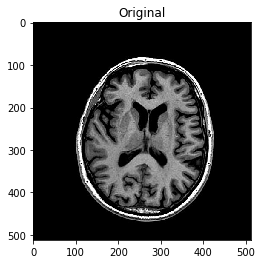

In [29]:
import imageio
import matplotlib.pyplot as plt

img = imageio.imread('axial-brain.jpg')
plt.imshow(img, cmap='gray')
plt.title("Original")
plt.show()


- Define a 15 x 15 kernel (k1), where all non-diagonal elements are set to zero, and on the diagonal to 1/15 . Use convolution to filter the brain image with the given kernel. (3P) What effect does this filter have on the input image? (1P)

# to do: answer

In [3]:
import numpy as np

In [4]:
#Defining the kernel 1
kernel_1=np.zeros(shape=(15,15))
for i in range(15):
    for j in range(15):
        if i==j:
            kernel_1[i][j]=1/15


In [5]:
from PIL import Image
jpgfile = Image.open("axial-brain.jpg")
jpg=np.array(jpgfile)

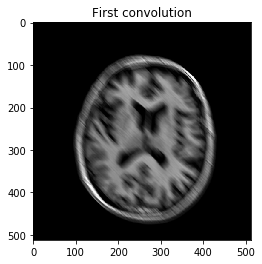

In [31]:
#diagonal kernel
from scipy import ndimage
conv_1=ndimage.convolve(img, kernel_1)
plt.imshow(conv_1, cmap='gray')
plt.title("First convolution")
plt.show()

Answer: It makes the image blurry, mixing the intensities in the lowerright diagonal direction.

- Repeat the last task with a new 15 x 15 kernel (k2), with all the elements being zero everywhere, except the elements on 8th row (if we start counting at one) are set to 1/15 . What is the effect of applying this filter on the input image? (1P)

Answer: It makes the image blurry, mixing the intensities in the horizontal direction.

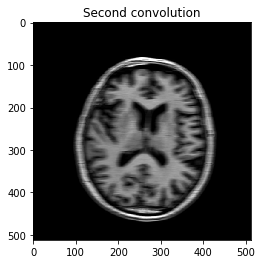

In [42]:
#Defining the kernel 2
kernel_2=np.zeros(shape=(15,15))
for i in range(15):
    for j in range(15):
        if i==7:
            kernel_2[i][j]=1/15
#Second convolution
conv_2=ndimage.convolve(img, kernel_2)
plt.imshow(conv_2, cmap='gray')
plt.title("Second convolution")
plt.show()


- Briefly explain what is the difference between applying both filters k1 and k2 on the image using different orders, i.e., once apply k1 first and then k2, and once k2 first and then k1?(2P)

Answer: The order of the filters (convolutions) is irrelevant, because the Convolution process is commutative.

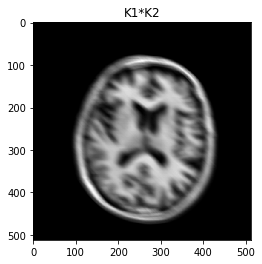

In [36]:
#First K1, then K2
conv_1=ndimage.convolve(img, kernel_1)
final_conv=ndimage.convolve(conv_1,kernel_2)
plt.imshow(final_conv, cmap='gray')
plt.title("K1*K2")
plt.show()


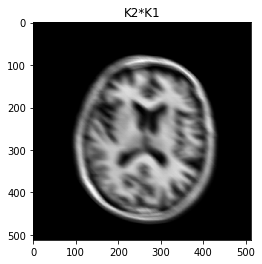

In [35]:
#First K2, then K1
conv_2=ndimage.convolve(img, kernel_2)
final_conv=ndimage.convolve(conv_2,kernel_1)
plt.imshow(final_conv, cmap='gray')
plt.title("K2*K1")
plt.show()


- Is applying both filters k1 and k2 on the image, with k1 first and then k2, the same as applying a 15 x 15 kernel, with all elements set to zero except the elements on the diagonal and on the 8th row that are set to 115 ? If yes, briefly explain why. If no, then what is the equivalent filter for applying k1 and k2? (3P)

Answer: No. To obtain the same result we could apply the convolution (full - using full cell padding) of kernel 1 and kernel 2 (or 2 and 1) and then apply the resulting kernel to the original image.

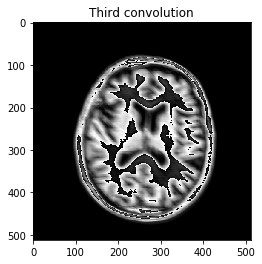

In [43]:
#Defining the kernel 3
kernel_3=np.zeros(shape=(15,15))
for i in range(15):
    for j in range(15):
        if i==7:
            kernel_3[i][j]=1/15
        elif i==j:
            kernel_3[i][j]=1/15

#Combined convolution
conv_3=ndimage.convolve(img, kernel_3)
plt.imshow(conv_3, cmap='gray')
plt.title("Third convolution")
plt.show()

Convolved kernel size: (29, 29)


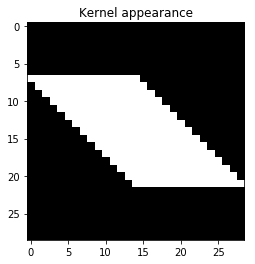

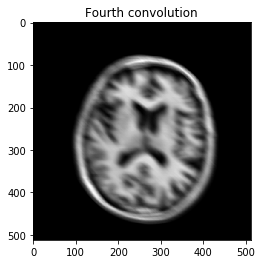

In [57]:
#Defining the kernel 4
import scipy.signal

kernel_4=scipy.signal.convolve2d(kernel_1, kernel_2, mode='full')
print("Convolved kernel size:", kernel_4.shape)

#Combined convolution
conv_4=ndimage.convolve(img, kernel_4)
plt.imshow(kernel_4, cmap='gray')
plt.title("Kernel appearance")
plt.show()
plt.imshow(conv_4, cmap='gray')
plt.title("Fourth convolution")
plt.show()

b) Use Canny edge detection from the scikit-image library to detect edges of the input image at
different scales sigma = {0.001; 1; 2; 3g} (3P) 






-Combine the resulting edges at different scales into one grayscale image, with edges at finer scales having smaller intensity values, similar to Figure 1.

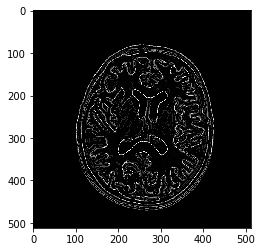

In [12]:
from skimage import feature
sigma=[0.001,1,2,3]
edges=dict()
intensities=[0.1,1,2,3]

# calculate edges for each value of sigma
for each,i in zip(sigma,intensities):
    im = ndimage.gaussian_filter(img,sigma=each)
    edges[str(each)]=feature.canny(im,sigma=each)
    edges[str(each)]=edges[str(each)]*i
#create an empty array
final=np.zeros(shape=(edges['1']).shape)

#calculate final array based on the weight given to each array of edges
for each in sigma:
    final=final+edges[str(each)]

plt.imshow(final,cmap = 'gray')
plt.show()

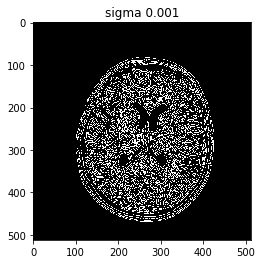

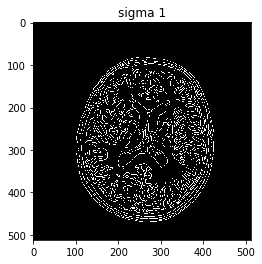

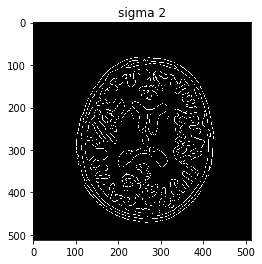

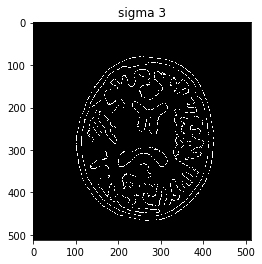

In [13]:
for each in sigma:
    plt.imshow(edges[str(each)],cmap = 'gray')
    plt.title("sigma "+ str(each))
    plt.show()

-(1P) By comparing the edge image to the input, what do you think is the role of f in detecting
edges? (1P)

Answer: When the sigma is large, the large edges are detected. On the contrary if the sigma is small, the fine edges are detected

c) As you saw in the lecture, images can be described as a scalar function f(x; y). In this task, you
will implement image warping, which is for example used for distortion correction. In our case,
we will use it to create a fish eye effect on the input, as you see in the right image in Figure 1.
- We will implement backward warping, i.e., iterate over the pixel locations (xo; yo) in the
output image, and copy over the intensity value from the corresponding position (xi; yi) in
the input image. Our fish eye warping will be implemented in polar coordinates: (See equations in handout)
    
    
    
where (cx; cy) is the center of the fish eye. First implement the given equations to compute ri and fi. (5P)



- Use ri and fi to estimate (xi; yi), that is the pixel location in the input image. (3P)

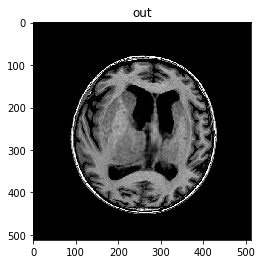

In [15]:
import math
def get_ro(xo, cx, yo, cy):
    result= (xo-cx)**2
    result+= (yo-cy)**2
    return result**.5
def get_ri(ro_):
    return 0.87*np.exp((ro_**.4)/1.5)
def get_thetaio(xo, cx, yo, cy):
    return np.arctan2((yo-cy),(xo-cx))
def fishintensity(ri, th_i,cx,cy):
    i=int(((ri*np.cos(th_i))+cx).round())
    j=int(((ri*np.sin(th_i))+cy).round())
    if (0<=i<img.shape[0]) and (0<=j<img.shape[1]):
        return img[i][j]
    else:
        return 0

output=np.zeros_like(img)
cx=output.shape[0]//2
cy=output.shape[1]//2
for i in range(len(output)):
    for j in range(len(output[1])):
        #if i==cx and j==cy:
        ro=get_ro(i,cx,j,cy)
        ri=get_ri(ro)
        theta=get_thetaio(i,cx,j,cy)
        output[i][j]=fishintensity(ri,theta,cx,cy)

        # TO DO: should we use the bilinear interpolation?
        
plt.imshow(output,cmap='gray')
plt.title("out")
plt.show()


- Briefly explain whether it would be different to create the resulting image by iterating over input pixels to find the corresponding pixels in the output image (forward warping)? (2 pts)

Yes. Some of the pixels in the input image will find the same pixels in the output image, overwriting them and creating and unaccurate image. 
# TO DO: todo: explain better

### Exercise 2 (Markov Random Fields, 25 Points)

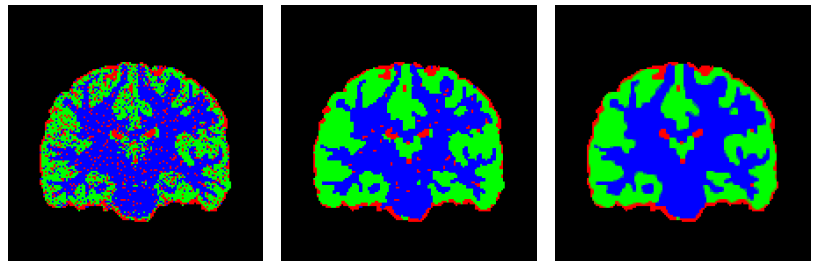

#### Figure 2:

A discretized version of the segmentation result from sheet 4 (left), the result after repeated
application of Iterated Conditional Modes with higher values of f (center), and the final probabilistic
segmentation result with the MRF term (right).

a) Load the noisy brain image brain-noisy.png from sheet 4, and download the mask.png from the
lecture homepage. Based on your implementation of the EM algorithm from sheet 4, but leaving
out the median filtering, create a discrete (hard / non-probabilistic) label image that contains the
most likely material for each pixel. Output it as an RGB image. For the segmentation use the
mask.png in order to apply the algorithms only on the foreground pixels. (3P)


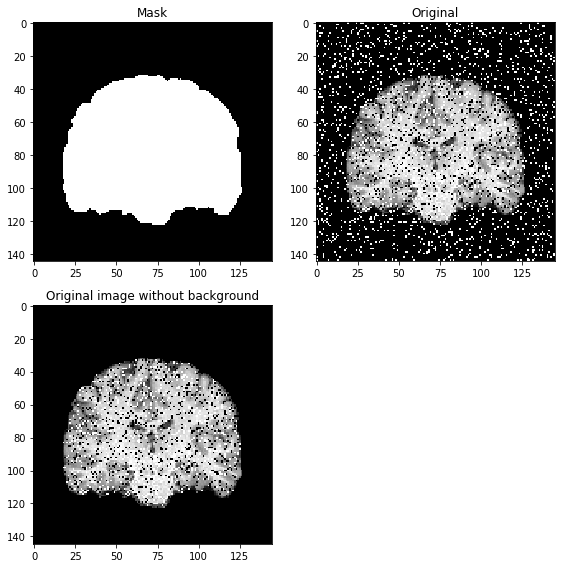

In [16]:
import imageio
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import NullFormatter
#from scipy import signal

img = imageio.imread('brain-noisy.png')
mask = imageio.imread('mask.png')

plt.figure(1, figsize=(8,8))

plt.subplot(221)
plt.imshow(mask, cmap='gray')
plt.title("Mask")

plt.subplot(222)
plt.imshow(img, cmap='gray')
plt.title("Original")

masked = np.ma.minimum(mask, img)

plt.subplot(223)
plt.imshow(masked, cmap='gray')
plt.title("Original image without background")
plt.tight_layout() 
plt.show()

In [17]:
%%time
from math import pi, sqrt, exp

def nx(x, mu, sigma):
    result = -(x- mu)**2
    result /= 2*(sigma**2)
    return exp(result)/(sqrt(2*pi)*sigma)

def e_step(data, mask, mu, sigma, pi_, K):
    result= np.zeros((data.shape[0], data.shape[1], K), dtype=float)
    for i, line in enumerate(data):
        for j, v in enumerate(line):
            den = 0
            if mask[i][j]:
                for k in range(K):
                    result[i,j][k] = nx(v, mu[k], sigma[k])*pi_[k]
                    den+= result[i,j][k]
                for k in range(K):
                    result[i,j][k] /= den
    return result

def m_step(resp, mask, data, K):
    Nk = np.sum(resp, axis=(0,1))
    mu = [0]*K
    for k in range(K):
        for i, line in enumerate(data):
            for j, val in enumerate(line):
                mu[k] += val*resp[i, j, k]
        mu[k]/=Nk[k]
    sigma = [0]*K
    for k in range(K):
        for i, line in enumerate(data):
            for j, val in enumerate(line):
                sigma[k] += resp[i, j, k]*((val-mu[k])**2)
        sigma[k]= sqrt(sigma[k]/Nk[k])
    n=np.count_nonzero(mask)
    pi_= [x/n for x in Nk]
    return (mu, sigma, pi_)


def em_algorithm(data, mask, k):
    #initialize
    mu=[30, 150, 220]
    sigma=[10,5,5]
    oldmu=[0]*k
    olds =[0]*k
    z=np.zeros((data.shape[0], data.shape[1], k), dtype=float)
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            if mask[i][j]:
                if 0<=data[i,j]<155: z[i,j,0]=1
                if 155<=data[i,j]<200: z[i,j,1]=1 
                if data[i,j]>=200: z[i,j,2]=1
    pi_ = np.average(z, axis=(0,1))
    resp = e_step(data, mask, mu, sigma, pi_, k)
    mu, sigma, pi_ = m_step(resp, mask, data, k)
    resp = e_step(data, mask, mu, sigma, pi_, k)
    print("mu", mu)
    print("sigma", sigma)
    print("pi",pi_)
    return resp

c=em_algorithm(masked, mask, 3)

mu [33.188797705240354, 156.8231064463878, 224.83743658674663]
sigma [39.24041901542087, 18.288060120924843, 20.403898727879763]
pi [0.18950390125497593, 0.2891101688208323, 0.5213859299241924]
Wall time: 8.97 s
Parser   : 119 ms


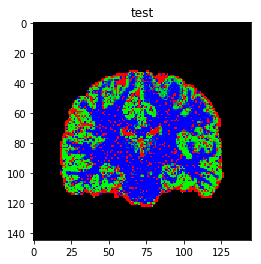

In [18]:

plt.imshow(c)
plt.title("test")
plt.show()

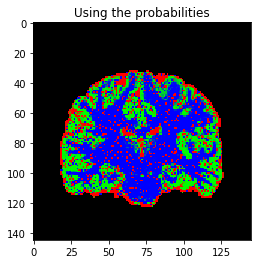

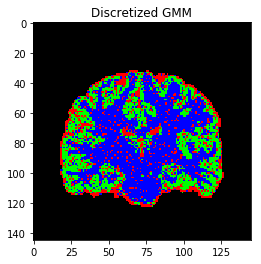

In [19]:
plt.imshow(c)
plt.title("Using the probabilities")
plt.show()


def discretizing(matrix):
    result = np.zeros_like(matrix)
    for i, line in enumerate(matrix):
        for j, rgb in enumerate(line):
            if sum(rgb):
                result[i,j] = [x==max(rgb) for x in rgb]
    return result

a= discretizing(c)
a.shape
plt.imshow(a)

plt.title("Discretized GMM")
plt.show()



b) Implement one iteration of the Iterated Conditional Modes (ICM) algorithm (for a Markov Random Field that uses the Potts model and beta = 0:5) and use it to update the label image. Output
the result as an RGB image. (5P)

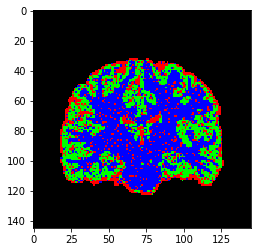

In [20]:
#Unary potential
def V(xi,mu,sigma):
    result=np.log(sqrt(2*np.pi)*sigma)
    result+=((xi-mu)**2)/(2*(sigma**2))
    return result

#Define Generalized Potts Model
def Potts(zi,zj,beta):
    return 0 if np.all([x==y for x,y in zip(zi,zj)]) else beta

#Function to retrieve the cliques:
def cliques(array,i,j):
    neighbours=[array[i-1][j],array[i+1][j],array[i][j-1],array[i][j+1]]
    neighbours=[x for x in neighbours if x.any()]
    return neighbours

def energy(resp,neighbours,beta):
    zmoozez=0
    for each in neighbours:
        zmoozez=Potts(resp,each,beta)+zmoozez
    return zmoozez

# 1 step ICM
def ICM_init(data, mask, mu, sigma):
    init = np.zeros((data.shape[0], data.shape[1], 3))
    for i in range(1,len(init[0])-1):
        for j in range(1,len(init[1])-1):
            # if the point is backgroun, skip it
            if mask[i][j]:
                red= V(data[i][j],mu[0],sigma[0])
                green= V(data[i][j],mu[1],sigma[1])
                blue= V(data[i][j],mu[2],sigma[2])
                dummie=min(red,blue,green)
                init[i][j]=[dummie==red,dummie==green,dummie==blue]
    return init

def ICM(resp, data, mu, sigma, beta):
    count=0
    result = np.zeros_like(resp)
    for i in range(1,len(resp[0])-1):
        for j in range(1,len(resp[1])-1):
            # if the point has no class, skip it
            if not np.any(resp[i][j]):
                continue
            neighbours=cliques(resp,i,j)
            red=energy(np.array([1. ,0., 0.]),neighbours,beta) + V(data[i][j],mu[0],sigma[0])
            green=energy(np.array([0. ,1., 0.]),neighbours,beta) + V(data[i][j],mu[1],sigma[1])
            blue=energy(np.array([0. ,0., 1.]),neighbours,beta) + V(data[i][j],mu[2],sigma[2])
            dummie=min(red,blue,green)
            result[i][j]=[dummie==red,dummie==green,dummie==blue]
            if np.any([x!=y for x, y in zip(result[i][j], resp[i][j])]):
                count+=1
    return result, count


# 1 step Iterated Conditional Models(ICM):
def ICM1(data, mask, mu, sigma, beta):
    # using a reasonable init
    resp = ICM_init(data, mask, mu, sigma)
    return ICM(resp, data, mu, sigma, beta)

# using the 2 step EM end parameters 
mymu = [33.188797705240354, 156.8231064463878, 224.83743658674663]
mysigma = [39.24041901542087, 18.288060120924843, 20.403898727879763]

first,_ = ICM1(masked, mask, mymu, mysigma, 0.5)
plt.imshow(first)
plt.show()

c) Apply your ICM iteration five times overall. Output the number of pixels whose label changes in
each iteration, and output the final labels as an RGB image. (3P)

Iteration 1 - Change in labels: 137
Iteration 2 - Change in labels: 28
Iteration 3 - Change in labels: 23
Iteration 4 - Change in labels: 23
Iteration 5 - Change in labels: 23


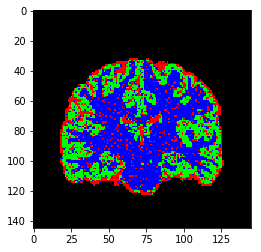

Wall time: 1min 1s


In [21]:
%%time
# 5 step Iterated Conditional Models(ICM):
def ICM5(data, mask, mu, sigma, beta):
    # using a reasonable init
    resp = ICM_init(data, mask, mu, sigma)
    for i in range(5):
        resp, cnt = ICM(resp, data, mu, sigma, beta)
        print("Iteration", i+1,"- Change in labels:", cnt)
    return resp, cnt

# using the 2 step EM end parameters 
mymu = [33.188797705240354, 156.8231064463878, 224.83743658674663]
mysigma = [39.24041901542087, 18.288060120924843, 20.403898727879763]

first,_ = ICM5(masked, mask, mymu, mysigma, 0.5)
plt.imshow(first)
plt.show()

d) Integrate your implementation of the ICM into the EM algorithm and run it until convergence.
Output the final result as an RGB image. (6P)

In [22]:
# Iterated Conditional Models(ICM) integrated to EM:
def ICM_EM(data, mask, mu, sigma, beta):
    # using a reasonable init
    resp = ICM_init(data, mask, mu, sigma)
    resp, cnt = ICM(resp, data, mu, sigma, beta)
    # resp contains the hard labels
    # Calculate posterior distribution of labels ???
    cnt = 100
    rep=0
    oldmu=[0]*3
    oldsi=[0]*3
    cond=[True]*3
    while cnt and rep<13 and np.any(cond):
        oldmu, oldsi = mu, sigma
        mu, sigma, _ = m_step(resp, mask, data, K=3)
        resp, cnt = ICM(resp, data, mu, sigma, beta)
        cond = [abs(x[0]-x[1])>0.1 and abs(x[2]-x[3])>0.1 for x in zip(mu, oldmu, sigma, oldsi)]
        print("changed:", cnt)
        print("mu", mu)
        print("sigma", sigma)
        rep+=1
    return resp, cnt

changed: 102
mu [35.277415143603136, 159.40706476030277, 226.12002017145738]
sigma [40.8064838523122, 18.533809277590812, 19.564257694125136]
changed: 49
mu [37.110331632653065, 160.67698744769874, 226.5696784073507]
sigma [42.076187523617826, 18.127311675519703, 19.25105141414296]
changed: 31
mu [38.18753933291378, 161.3757828810021, 226.80678314491263]
sigma [42.823287228580796, 17.943774345111034, 19.092210796147203]
changed: 17
mu [38.78201124297314, 161.80708333333334, 226.9625806451613]
sigma [43.208563546189055, 17.82848469424852, 18.9869467840139]
changed: 7
mu [39.299813780260706, 162.05632040050062, 227.02843846949327]
sigma [43.57110094953059, 17.720697245482384, 18.940122760918033]
changed: 1
mu [39.61038961038961, 162.16638795986623, 227.03775536591672]
sigma [43.787524206108586, 17.63962192154651, 18.933706893129028]
changed: 0
mu [39.61038961038961, 162.1792728792311, 227.04655975168131]
sigma [43.787524206108586, 17.647191176759172, 18.928238834100668]


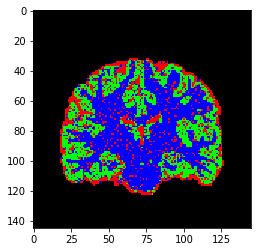

In [23]:
final,cnt = ICM_EM(masked, mask, mymu,mysigma,beta=0.5)
plt.imshow(final)
plt.show()

changed: 967
mu [58.989375, 158.4747474747475, 221.86240463036043]
sigma [66.70379870824024, 49.59963005611953, 22.777460147507345]
changed: 858
mu [69.04566563467492, 152.4297794117647, 213.79166666666666]
sigma [70.53676503180027, 55.56436578905138, 48.811096162751504]
changed: 662
mu [84.0527289546716, 151.29233576642335, 203.3304562268804]
sigma [71.01438919772777, 60.96539295649463, 63.52775287708337]
changed: 579
mu [76.79429133858268, 150.42189781021898, 203.81747572815533]
sigma [67.42111172321225, 58.98853744315936, 63.682927292795924]
changed: 552
mu [83.27845528455285, 149.84273318872016, 202.0106640814348]
sigma [68.56573386924751, 61.99289310647787, 65.01696622375921]
changed: 543
mu [78.47107438016529, 149.72381297571584, 202.6654615570017]
sigma [66.40773122622333, 60.29434730217845, 64.90762047049013]
changed: 541
mu [82.70582120582121, 149.72743682310468, 201.64068532818533]
sigma [67.67022692944968, 62.194672873674044, 65.37621297599351]
changed: 540
mu [78.4378265412

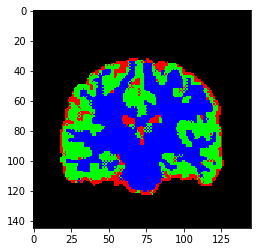

In [24]:
final,cnt = ICM_EM(masked, mask, mymu,mysigma,12)
plt.imshow(final)
plt.show()

f) Compare the output from task e) to the result of segmentation using GMM. How do the segmentation images differ and how would you explain the difference? (2P)

In [25]:
# TO DO: ANSWER


g) So far, given the different methods for image segmentation, when would you choose  (3P)

i) Threshold based segmentation 

- 

ii) GMM 

- Low to no noise

iii) MRF for segmenting a given image?

- Higher noise. 

In [26]:
# TO DO: ANSWER WITH MORE WORDS